In [1]:
import cv2
import numpy as np
import imutils
from matplotlib import pyplot as plt

More tutorials on opencv can be found:

https://docs.opencv.org/master/d2/d96/tutorial_py_table_of_contents_imgproc.html

In [2]:
path = "tetris_blocks.png"

Load the input image (whose path was supplied via command line argument) and display the image to our screen

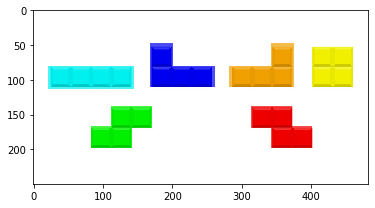

In [3]:
bgr_img = cv2.imread(path)
b,g,r = cv2.split(bgr_img)       # get b,g,r
image = cv2.merge([r,g,b])
plt.imshow(image)

Convert the image to grayscale

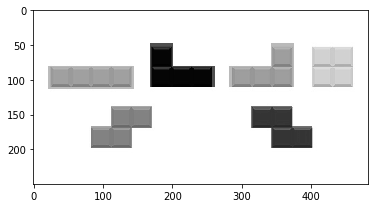

In [5]:
# RGB2GRAY
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap = 'gray')

Applying edge detection we can find the outlines of objects in images


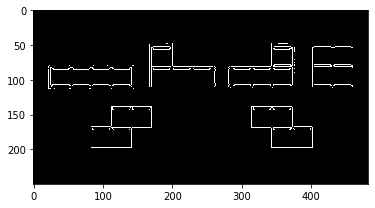

In [7]:
# Canny提取边缘
edged = cv2.Canny(gray, 30, 150)
plt.imshow(edged, cmap='gray')

Threshold the image by setting all pixel values less than 225 to 255(white; foreground) and all pixel values >= 225 to 255 (black; background), thereby segmenting the image.

This can be tweeked so say all pixel values less than 128.

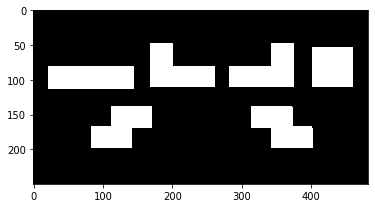

In [8]:
# 阈值提取
threshold = 225
threshold_value = 255

thresh = cv2.threshold(gray, threshold, threshold_value, cv2.THRESH_BINARY_INV)[1]
plt.imshow(thresh, cmap='gray')

Find contours (i.e., outlines) of the foreground objects in the thresholded image

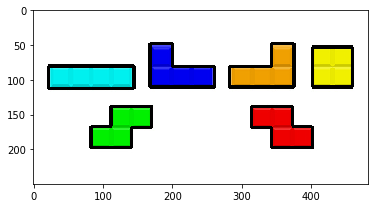

In [12]:
# 寻找contours
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
output = image.copy()
for c in cnts:
    # draw each contour on the output image with a 3px thick black outline
    cv2.drawContours(output, [c], -1, (0, 0, 0), 3)
    
plt.imshow(output)

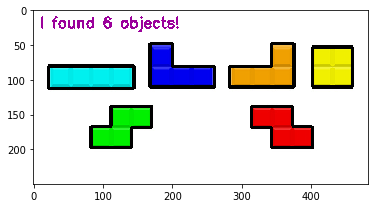

In [14]:
text = "I found {} objects!".format(len(cnts))
cv2.putText(output, text, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX, 0.7, (155, 0, 155), 2)
plt.imshow(output)

We apply erosions to reduce the size of foreground objects

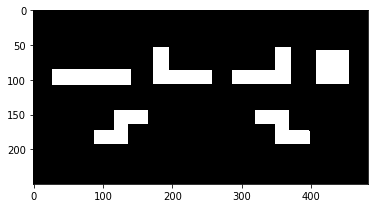

In [16]:
# morphological operation
mask = thresh.copy()
mask = cv2.erode(mask, None, iterations = 5)
plt.imshow(mask, cmap = 'gray')

Similarly, dilations can increase the size of the ground objects

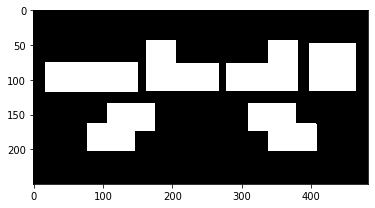

In [17]:
mask = thresh.copy()
mask = cv2.dilate(mask, None, iterations = 5)
plt.imshow(mask, cmap='gray')

A typical operation we may want to apply is to take our mask and apply a bitwise AND to our input image, keeping only the masked regions

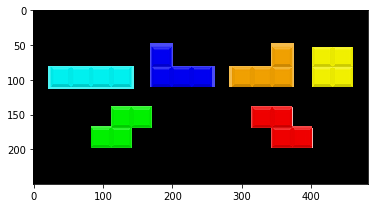

In [20]:
# bool 操作
mask = thresh.copy()
output = cv2.bitwise_and(image, image, mask=mask)
plt.imshow(output)

# Ex 1
    A) Can you remove the yellow square from the image?
    B) Go through the tutorial but with the "spheres.png" image. (replace tetris_blocks with spheres.png)
    C) Tweak the parameters of the thresholding can you threshold all the spheres?
    D) Can you remove the red sphere?
    C) Can you remove the green?

[241 240   0]


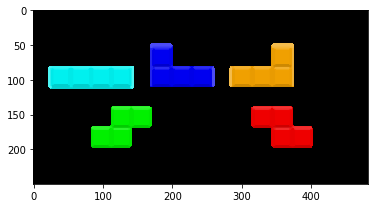

In [22]:
# remove yellow square
# 通过选择颜色的区间来移除黄色方格
# Use RGB
pix = output[100,410,:]
print(pix)
mask = cv2.inRange(output, np.array([185, 185, 0]), np.array([255, 255,60]))
mask = -mask+255
img = cv2.bitwise_and(output, output, mask=mask)
plt.imshow(img)
median = cv2.medianBlur(img,5)
plt.imshow(median)

[[[402  53]]

 [[402 110]]

 [[459 110]]

 [[459  53]]]
402
53
459
110


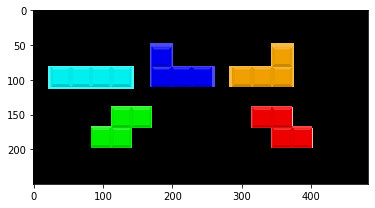

In [24]:
# 用blob，手动找到序号移除
obj = cnts[3]
print(obj)
#cv2.drawContours(output, [c], -1, (255, 0, 0), 3)
#print(obj)
#plt.imshow(output)
x = obj[:,0][:,0]
y = obj[:,0][:,1]
print(min(x))
print(min(y))
print(max(x))
print(max(y))
op = output.copy()
cv2.rectangle(op, (min(x),min(y)), (max(x), max(y)), (0, 0, 0), -1) 
plt.imshow(op)

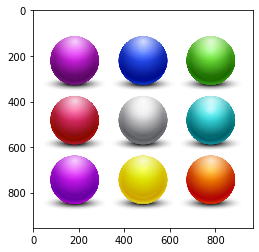

In [25]:
## new image
path = "spheres.png"
bgr_img = cv2.imread(path)
b,g,r = cv2.split(bgr_img)       # get b,g,r
image = cv2.merge([r,g,b])
plt.imshow(image)

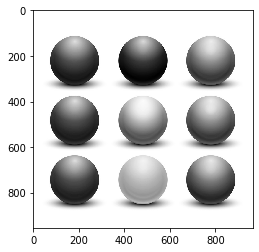

In [26]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap = 'gray')

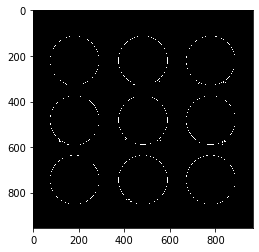

In [27]:
edged = cv2.Canny(gray, 30, 150)
plt.imshow(edged, cmap='gray')

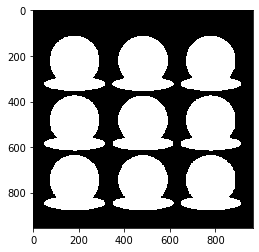

In [28]:
threshold = 252
threshold_value = 255

thresh = cv2.threshold(gray, threshold, threshold_value, cv2.THRESH_BINARY_INV)[1]
#thresh = cv2.medianBlur(thresh, 5)
mask = thresh.copy()
mask = cv2.erode(mask, None, iterations = 5)
mask = cv2.dilate(mask, None, iterations = 5)
plt.imshow(mask, cmap = 'gray')
thresh = mask
#plt.imshow(thresh, cmap='gray')

In [29]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
output = image.copy()

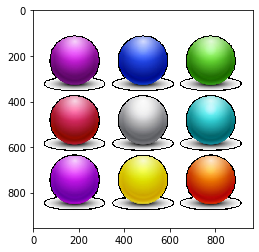

In [30]:
for c in cnts:
    # draw each contour on the output image with a 3px thick black outline
    cv2.drawContours(output, [c], -1, (0, 0, 0), 3)
plt.imshow(output)

9


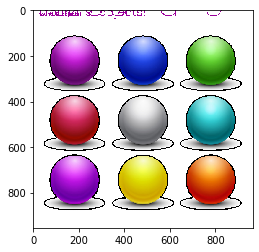

In [35]:
text = "I found {} objects!".format(len(cnts))
print(len(cnts))
cv2.putText(output, text, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX, 0.7, (155, 0, 155), 2)
plt.imshow(output)

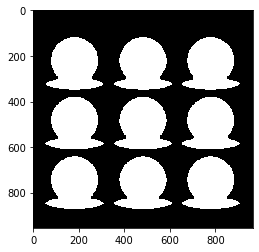

In [37]:
mask = thresh.copy()
mask = cv2.erode(mask, None, iterations = 5)
plt.imshow(mask, cmap = 'gray')

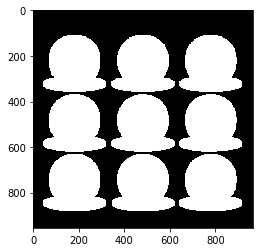

In [38]:
mask = thresh.copy()
mask = cv2.dilate(mask, None, iterations = 5)
plt.imshow(mask, cmap='gray')

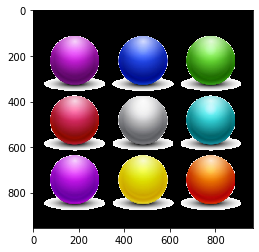

In [39]:
mask = thresh.copy()
output = cv2.bitwise_and(image, image, mask=mask)
plt.imshow(output)

49
374
315
615


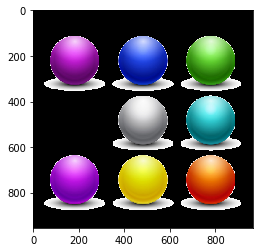

In [40]:
# remove red ball
'''
pix = []
mi = []
ma = []
#output = cv2.cvtColor(output, cv2.COLOR_RGB2LAB)
for k in range(3):
    for i in range(480,500):
        for j in range(120, 200):
            pix.append(output[i, j, k])
    print(min(pix))
    print(max(pix))
    mi.append(min(pix))
    ma.append(max(pix))
mask = cv2.inRange(output, np.array(mi), np.array(ma))
mask = -mask+255
img = cv2.bitwise_and(output, output, mask=mask)
plt.imshow(img)
#median = cv2.medianBlur(img,5)
#plt.imshow(median)
'''
obj = cnts[5]
#cv2.drawContours(output, [c], -1, (255, 0, 0), 3)
#print(obj)
#plt.imshow(output)
x = obj[:,0][:,0]
y = obj[:,0][:,1]
print(min(x))
print(min(y))
print(max(x))
print(max(y))
op = output.copy()
cv2.rectangle(op, (min(x),min(y)), (max(x), max(y)), (0, 0, 0), -1) 
plt.imshow(op)

647
113
912
353


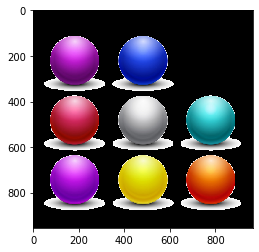

In [41]:
# green ball
obj = cnts[6]
#cv2.drawContours(output, [c], -1, (255, 0, 0), 3)
#print(obj)
#plt.imshow(output)
x = obj[:,0][:,0]
y = obj[:,0][:,1]
print(min(x))
print(min(y))
print(max(x))
print(max(y))
op = output.copy()
cv2.rectangle(op, (min(x),min(y)), (max(x), max(y)), (0, 0, 0), -1) 
plt.imshow(op)